In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'india_housing_prices.csv')

In [4]:
df.head(10)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
5,6,West Bengal,Durgapur,Locality_246,Apartment,4,3500,135.28,0.04,2020,...,5,7,7,Low,Yes,Yes,"Playground, Clubhouse",West,Broker,Ready_to_Move
6,7,Tamil Nadu,Coimbatore,Locality_254,Independent House,3,4826,318.12,0.07,2016,...,9,3,6,High,No,Yes,"Clubhouse, Garden, Playground",North,Builder,Under_Construction
7,8,Chhattisgarh,Bilaspur,Locality_490,Independent House,5,4252,141.39,0.03,2021,...,4,10,10,High,Yes,Yes,"Gym, Pool, Clubhouse, Playground",North,Builder,Under_Construction
8,9,Delhi,New Delhi,Locality_232,Villa,4,2678,189.16,0.07,2003,...,22,7,5,Low,No,Yes,"Garden, Clubhouse, Playground",South,Broker,Under_Construction
9,10,Jharkhand,Ranchi,Locality_122,Villa,2,1393,187.42,0.13,2011,...,14,3,3,High,Yes,No,"Clubhouse, Playground, Garden, Gym",East,Owner,Ready_to_Move


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

### does price depend significantly on state?

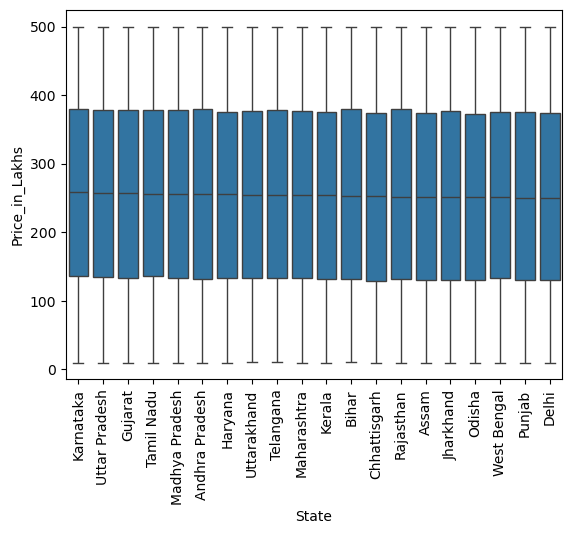

In [17]:
grouped_state=df.groupby('State')['Price_in_Lakhs'].agg(['median']).reset_index()
sorted_categories=grouped_state.sort_values(by='median', ascending=False)['State']
sns.boxplot(df, x='State', y='Price_in_Lakhs',order=sorted_categories)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Property_Type', ylabel='Price_in_Lakhs'>

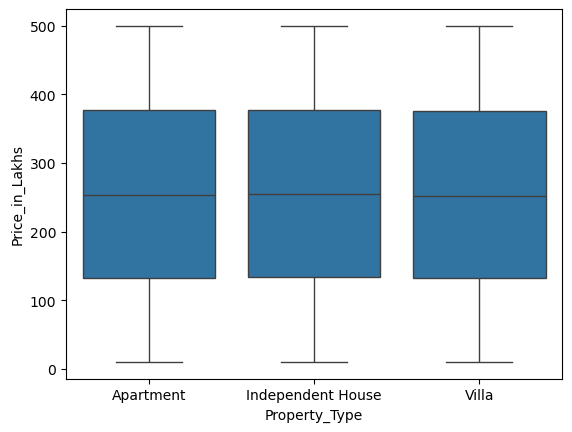

In [11]:
sns.boxplot(df, x="Property_Type", y="Price_in_Lakhs")